In [105]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statistics
from scipy.stats import skew

In [62]:
Shopify_store_data = pd.read_csv(r'C:\Users\bello\.ipynb_checkpoints\2019_Winter_Data_Science_Intern_Challenge_Data_Set.csv')


In [63]:
Shopify_store_data.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


From running a describe() command we are able to see that the mean of the order_amount is 3145.13. We have to conduct further analysis on the data to see if there are other factors that influence the data. We can also see a standard deviation of 41282.54 which is large and definitely tells us that the data is heavily skewed.

<AxesSubplot:>

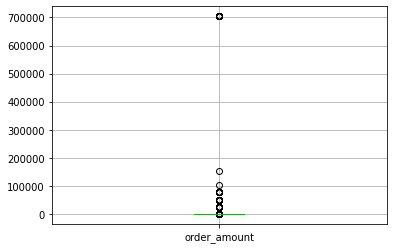

In [80]:
Shopify_store_data.boxplot(column='order_amount')

In [112]:
#Find the Skewness
print(skew(Shopify_store_data.order_amount, bias=False))

16.675033432503795


By creating a boxplot of the data we can visualize the data and see that there a couple of outliers that make the data skewed.If the data is heavily skewed then the analysis we do on the data might not be accurate. The next step will be to review the data in the excel sheet to see if we can draw more data on the outliers.In an Ideal scenario we would contact the sales team to verify the outliers but for the sake of this challenge we will be cleaning the data   i.e removing the outliers

Fom the excel sheet we were able to see that the large orders came from shop Id's (42,78), with shop ID 42 buying 2000 shoes at multiple times during the month. They have similiar spending habits and are heavily skewing the dataset, it would make sense to get rid of the outliers in this dataset.

In [82]:
Shopify_store_data.amount = np.array(Shopify_store_data.order_amount)

C:\Users\bello\AppData\Local\Temp/ipykernel_19004/1635824355.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  Shopify_store_data.amount = np.array(Shopify_store_data.order_amount)


In [89]:
quantile1, quantile3= np.percentile(Shopify_store_data.amount, [25,75])
print(quantile1,quantile3)

163.0 390.0


In [90]:
#Find the Interquartile Range
IQR = quantile3 - quantile1
print(IQR)

227.0


In [93]:
## Find the Lower bound value and the higher bound value
lower_bound_val = quantile1 -(1.5 * IQR)
upper_bound_val = quantile3 +(1.5 * IQR)
print (lower_bound_val,upper_bound_val)
                

-177.5 730.5


<AxesSubplot:>

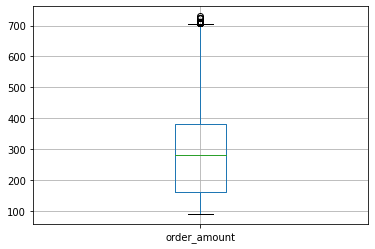

In [118]:
Clean_Store_Data = Shopify_store_data[(Shopify_store_data.order_amount < upper_bound_val) & (Shopify_store_data.order_amount > lower_bound_val)]
Clean_Store_Data.boxplot(column='order_amount')


In [109]:
Clean_Store_Data.order_amount.describe()


count    4859.000000
mean      293.715374
std       144.453395
min        90.000000
25%       162.000000
50%       280.000000
75%       380.000000
max       730.000000
Name: order_amount, dtype: float64

b)What metric would you report for this dataset?
Answer: I would use the median to report this dataset because for skewed or outlier-filled distributions, the median is the most useful metric of central tendency. Extreme outliers or non-symmetric distributions of scores have no effect on the median because it only uses one or two values. In skewed distributions, however, the mean and mode might fluctuate.

c)The MOV for the Original Dataset is 284.00  
  The AOV for the Cleaned Dataset is 293.72